<a href="https://colab.research.google.com/github/I-ULISES-I/Colabfiles/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández Rodríguez Ulises
*   Matrícula: 256056

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [ ]:
# Escribe tu código aquí
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#
df = pd.read_csv('drive/MyDrive/ClassFiles/restaurantes.csv')

#
print(df.head())

#
print("\n", df.describe())

   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233

        poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?** Si, porque conforme la población de la ciudad es mayor, la ganancia del restaurante también tiende a aumentar.

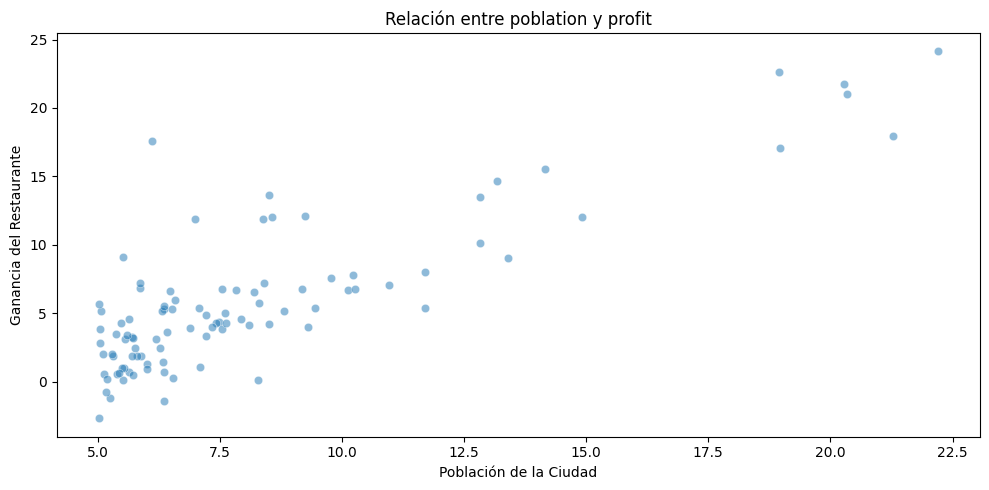

In [ ]:
# Diagrama de dispersión
#
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['poblation'], y=df['profit'], alpha=0.5)
plt.title("Relación entre poblation y profit")
plt.xlabel("Población de la Ciudad")
plt.ylabel("Ganancia del Restaurante")
plt.tight_layout()
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación? Es altamente fuerte, con un valor de 0.837873.
- ¿Es positiva o negativa? Positiva.
- ¿Es coherente con el gráfico anterior? Si.

In [ ]:
# Cálculo de correlación
#
matriz_correlacion = df.corr()
print(matriz_correlacion)

           poblation    profit
poblation   1.000000  0.837873
profit      0.837873  1.000000


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema? El intercepto, con un valor de -3.8957808783118484 indica que (en teoría) un restaurant tendrá una pérdida promedio mensual de 38,957 unidades aproximadamente, suponiendo que la población fuese 0 en alguna ciudad.
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema? El coeficiente de la regresión, con un valor de 1.19303364, indica que un restaurant tendrá una ganancia de 11,930 unidades aproximadamente por cada 10,000 habitantes.

In [ ]:
# Construcción del modelo  y Coeficientes del modelo
#
x = df[['poblation']]
y = df['profit']
modelo = LinearRegression()
modelo.fit(x, y)

#
coeficiente = modelo.coef_
intercepto = modelo.intercept_
print(intercepto)
print(coeficiente)

-3.8957808783118484
[1.19303364]


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

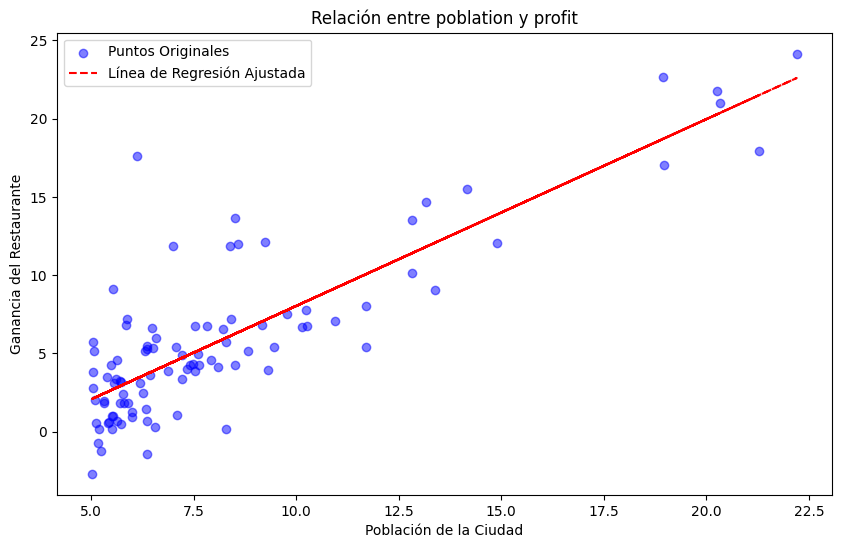

In [ ]:
# Visualización del modelo ajustado
#
y_predicha = modelo.predict(x)

# Graficar los valores reales frente a las predicciones
plt.figure(figsize=(10, 6))

# Graficar los valores reales vs las predicciones
plt.scatter(x, y, alpha=0.5, color='blue', label='Puntos Originales')
plt.plot(x, y_predicha, color='red', linestyle='--', label='Línea de Regresión Ajustada')

# Añadir título y etiquetas
plt.title("Relación entre poblation y profit")
plt.xlabel("Población de la Ciudad")
plt.ylabel("Ganancia del Restaurante")

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal? No, tienen un sesgo a la derecha.

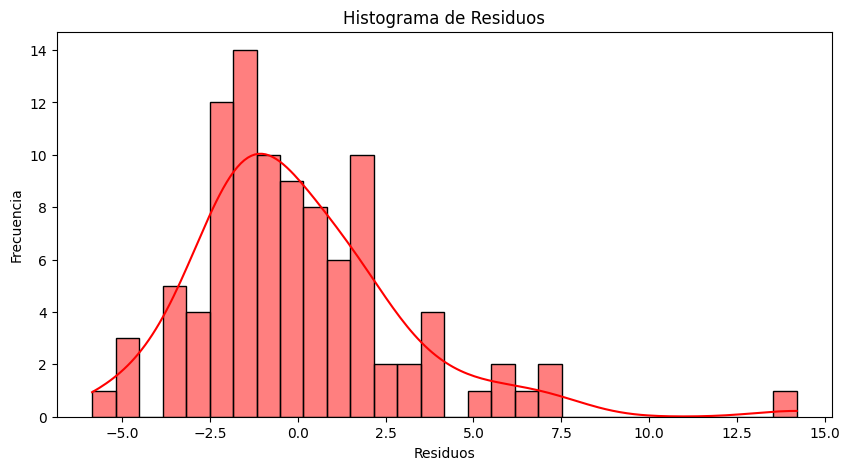

In [ ]:
# Normalidad de los residuos
#
residuos = y - y_predicha

#Creación y diseño de los histogramas.
plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30, color='red')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

#Impresión de los gráficos.
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón? Parece ser que están distribuidos aleatoriamente.

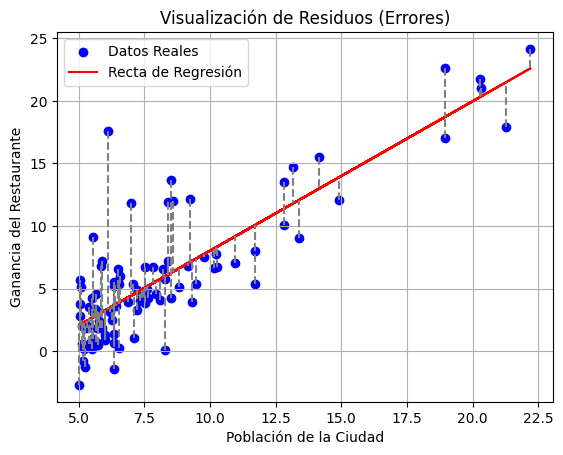

In [ ]:
# Gráfico de residuos vs predichos
#
plt.scatter(df['poblation'], df['profit'], color ='blue', label='Datos Reales')
plt.plot(df['poblation'], y_predicha, color='red', label='Recta de Regresión')

for i in range(len(df)):
  plt.plot([df.loc[i, 'poblation'], df.loc[i, 'poblation']], [df.loc[i, 'profit'], y_predicha[i]], color='gray', linestyle='--')

plt.title('Visualización de Residuos (Errores)')
plt.xlabel("Población de la Ciudad")
plt.ylabel("Ganancia del Restaurante")
plt.legend()
plt.grid(True)
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

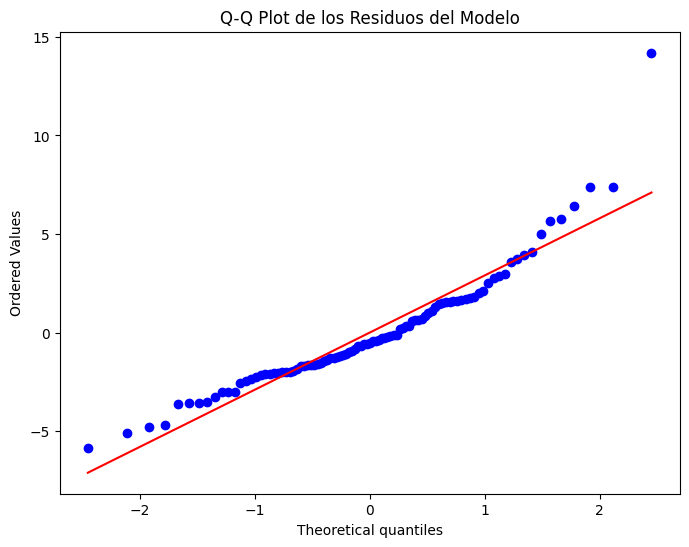

In [ ]:
# Q-Q Plot
#
# Graficar el Q-Q Plot
plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)

# Añadir título
plt.title("Q-Q Plot de los Residuos del Modelo")

# Mostrar la gráfica
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo? Personalmente considero que, tanto el MSE como el RMSE son elevados, ya que nos indican (en términos de unidades) la distancia a la cual están las predicciones del modelo de los valores reales. Por otro lado, el $R^2$ parece bastante aceptable; un valor de 0.7020 indica que el modelo explica aproximadamente el 70.2% de la variabilidad de los datos.

In [ ]:
# Evaluación del modelo
#
# Calcular las métricas del modelo
mse = mean_squared_error(y, y_predicha)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y, y_predicha)  # Coeficiente de determinación R^2

# Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 8.9539
Raíz del Error Cuadrático Medio (RMSE): 2.9923
Coeficiente de Determinación (R²): 0.7020


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo? El modelo parece ser bastante útil, ya que tiene un $R^2$ del 0.7020.
- ¿Qué limitaciones encuentras? Tanto el MSE como el RMSE son elevados, lo cual puede sugerir que el modelo no tiene un ajuste adecuado en sus parámetros.
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste. Es posible que alguna transformación ayude a normalizar los datos, de esta manera, el modelo podría calcular mejores parámetros.